In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std

from scipy import stats


In [2]:
path='//content/drive/MyDrive/DataSets'
df=pd.read_csv(path+'/marketing_data.csv', sep=',')

#Getting familiar with data

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [ ]:
#we can see that the column' Income', has an exra 'space' it's name. This mistake could cause problems in further analysis, 
#so we need to rename it. And change the data type
df.rename(columns={' Income ':'Income'}, inplace=True)
df['Income']=df['Income'].str.replace('$','').str.replace(',','')
df['Income']=df['Income'].astype(float)

In [10]:
#Let's create some useful columns to better understand the dataset and reveal interesting information

#Age
df['Age']=2021-df['Year_Birth']

#Total Amount spended
df['Spending']=df.MntWines+df.MntFruits+df.MntMeatProducts+df.MntFishProducts+df.MntSweetProducts+df.MntGoldProds

#total of children  at home
df['Children'] = df.Kidhome+df.Teenhome

In [11]:
#total years of education 
df.Education.unique().tolist()
years_edu={'Education': ['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'],
           'Edu_years':[14,21,12,17,6]}
years_edu=pd.DataFrame(years_edu)
df=pd.merge(df,years_edu,on='Education')


##Dealing with missing values
There are different techniques to deal with missing values, in this case I decided to try a KNN Imputer.

In [8]:
#looking for missing values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [12]:
#Complete missing values with KNN Imputation
imputer = KNNImputer()
imputer = KNNImputer(n_neighbors=5,metric='nan_euclidean')
# fit on the dataset
imputer.fit(df[['Income','Age','Edu_years']])
# transform the dataset
X = imputer.transform(df[['Income','Age','Edu_years']])
Income_impute=pd.DataFrame(X,columns=['Income','Age','Edu_years'])
df['Income']=Income_impute['Income'].reset_index(drop=True)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
Age                    0
Spending               0
Children               0
Edu_years              0
dtype: int64

#Statistical summary

In [13]:
pd.options.display.float_format='{:.2f}'.format
df[['Income','Age','Spending','Children','Edu_years']].describe()


,Income,Age,Spending,Children,Edu_years
count,2240.00,2240.00,2240.00,2240.00,2240.00
mean,52209.72,52.19,605.80,0.95,15.64
std,25060.99,11.98,602.25,0.75,3.37
min,1730.00,25.00,5.00,0.00,6.00
25%,35434.75,44.00,68.75,0.00,14.00
50%,51369.00,51.00,396.00,1.00,14.00
75%,68289.75,62.00,1045.50,1.00,17.00
max,666666.00,128.00,2525.00,3.00,21.00


In [14]:
df_plot=df[['Income','Age','Spending','Children','Edu_years']]
df_plot_melt=pd.melt(df_plot,value_vars=df_plot)
df_plot_melt

,variable,value
0,Income,84835.00
1,Income,57091.00
2,Income,67267.00
3,Income,32474.00
4,Income,21474.00
...,...,...
11195,Edu_years,6.00
11196,Edu_years,6.00
11197,Edu_years,6.00
11198,Edu_years,6.00


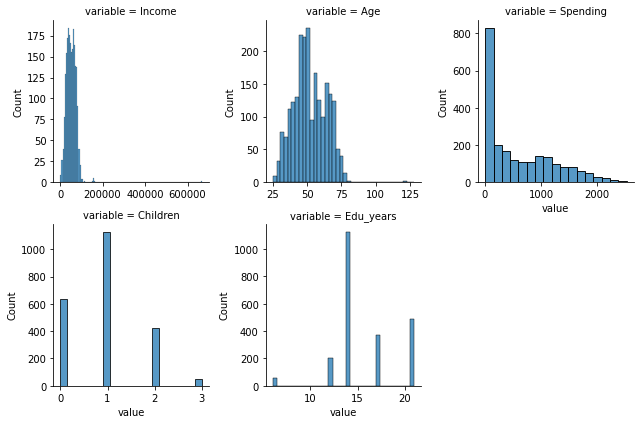

In [15]:
p1 = sns.FacetGrid (df_plot_melt, col='variable', col_wrap=3, sharex=False, sharey = False) #sharex y sharey hacen que cada gráfico tenga sus escalas en axis
p1 = p1.map(sns.histplot, 'value')

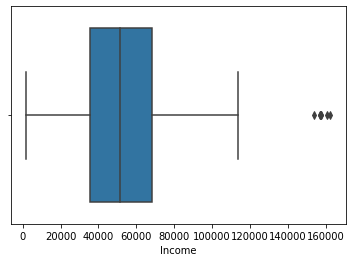

In [ ]:
ax=sns.boxplot(x=df['Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



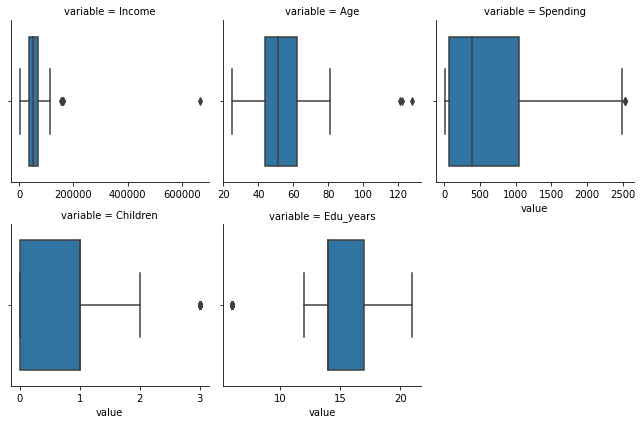

In [16]:
p2=sns.FacetGrid(df_plot_melt, col='variable', col_wrap=3, sharex=False, sharey=False)
p2=p2.map(sns.boxplot,'value')

In [17]:
#You can get a better presentation with plotly plots
fig = px.box(df_plot_melt, y="value", facet_col="variable",facet_col_wrap=2, boxmode="overlay", color="variable",height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()

In [18]:
#Before handlig missing values. let's remove ouliers from the columns we are going to analyze
df=df.drop(df[df['Income']>600000].index)


In [19]:
#Age have 3 values that are above the upper fence, as they are 121, 122, 128, we can consider these as outliers, so let's drop them.
df=df.drop(df[df['Age']>120].index)

#Visual EDA

* which country purchases the most?
* Which educational segment purchase more Wine?
* People with no chirldren buy less than people with kinds?
* How much do people spend according to their income?
* Which sales channel is the most effective?
* How many products per category are sell in every sales channel?
* Is the a correlation between the number of visits to the web site and the purchases made through the web site?
* what is the % of customers that accepted the offer through the 5th campaigns?
* Can we identify, what kind of customers would accept the offer in the 1st and 2th campaign?
* what segment of clients complains the most?
* Is there any correlation between variables?

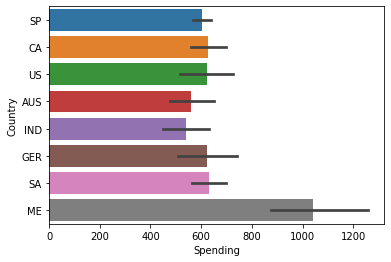

In [ ]:
#which country purchases the most?
sns.barplot(x=df['Spending'], y=df['Country'])

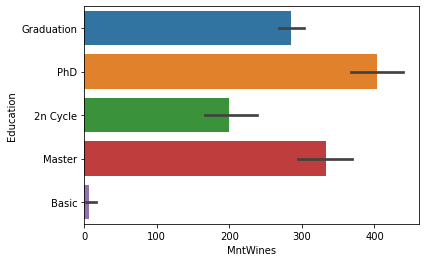

In [ ]:
#Which educational segment purchase more Wine?
sns.barplot(x=df['MntWines'],y=df['Education'])

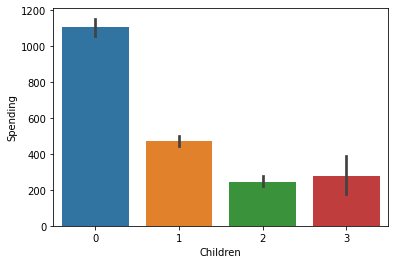

In [ ]:
#People with no chirldren buy less than people with kinds?
sns.barplot(y=df['Spending'], x=df['Children'])

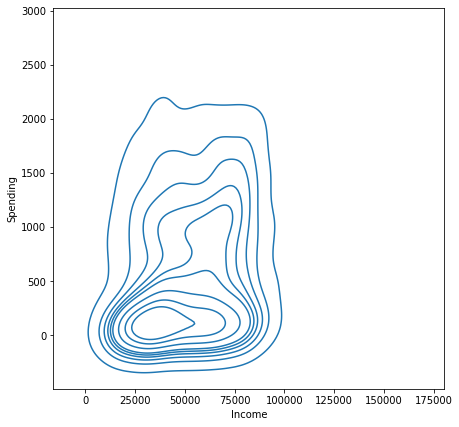

In [ ]:
#How much do people spend according to their income?
f, ax=plt.subplots(figsize=(7,7))
sns.kdeplot(data=df, x=df['Income'], y=df['Spending'])

In [ ]:
#Which sales channel is the most effective?
sales_channels=df[['NumCatalogPurchases','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
sales_channels=sales_channels.melt()

In [ ]:
Num_per_channel=sales_channels.groupby(by=sales_channels['variable'],as_index=False).sum()

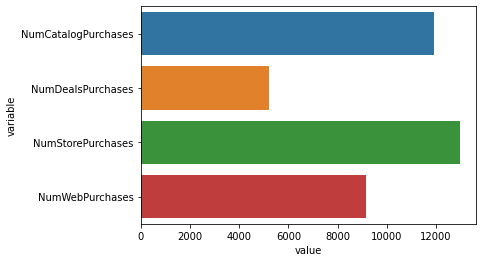

In [ ]:
sns.barplot(y=Num_per_channel['variable'],x=Num_per_channel['value'])

In [ ]:
#what is the total amount spended in every product category?
products=df[['MntWines',	'MntFruits',	'MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']]
products=products.melt()


In [ ]:
total_products=products.groupby(by=products['variable'],as_index=False).sum()

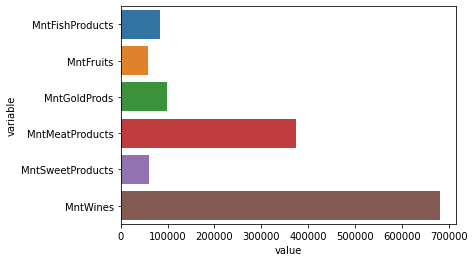

In [ ]:
sns.barplot(x=total_products['value'], y=total_products['variable'])

In [ ]:
#what is the % of customers that accepted the offer through the 5th campaigns?
campaign=df[['AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2']]
campaign.melt().sum()

variable    AcceptedCmp3AcceptedCmp3AcceptedCmp3AcceptedCm...
value                                                     666
dtype: object

In [ ]:
camp_perform=campaign.melt().groupby('variable').sum()

In [ ]:
camp_perform['percent']=camp_perform['value']/666
camp_perform

,value,percent
variable,,
AcceptedCmp1,144,0.22
AcceptedCmp2,30,0.05
AcceptedCmp3,163,0.24
AcceptedCmp4,167,0.25
AcceptedCmp5,162,0.24


##Logistic Regression

In [22]:
#What kind of customer accept an offer in the first campaing?
first_camp=df[df['AcceptedCmp1']>0]
first_camp[['Age','Income','Edu_years','Spending','Recency','Children']].describe()

,Age,Income,Edu_years,Spending,Recency,Children
count,144.00,144.00,144.00,144.00,144.00,144.00
mean,52.47,78324.44,15.64,1482.22,46.98,0.31
std,13.53,12180.69,3.02,507.38,28.38,0.63
min,27.00,36086.00,12.00,265.00,1.00,0.00
25%,42.00,72904.50,14.00,1126.25,25.00,0.00
50%,51.50,79767.00,14.00,1513.50,45.50,0.00
75%,64.00,85625.25,17.00,1853.00,71.25,0.00
max,77.00,105471.00,21.00,2524.00,99.00,3.00


In [21]:
#Develop a model to predict if a customer would accept an offer in the 1st campaing
In_couple={'Marital_Status':['Divorced', 'Single', 'Married', 'Together', 'Widow', 'Alone','Absurd', 'YOLO'],
            'Couple':[0,0,1,1,0,0,0,0]}
In_couple=pd.DataFrame(In_couple)

In [24]:
df=pd.merge(df,In_couple, on='Marital_Status')

In [25]:
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Spending,Children,Edu_years,Couple
0,1826,1970,Graduation,Divorced,84835.00,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,1190,0,14,0
1,340,1970,Graduation,Divorced,72967.00,0,1,12/15/12,1,158,35,179,0,0,125,2,7,2,8,5,1,0,0,0,0,1,0,GER,51,497,1,14,0
2,8461,1962,Graduation,Divorced,46102.00,2,1,3/10/14,3,14,0,1,0,0,1,1,1,0,2,7,0,0,0,0,0,0,0,SP,59,16,3,14,0
3,10177,1954,Graduation,Divorced,72071.00,0,1,2/14/13,4,531,69,300,150,138,150,3,5,4,8,2,0,0,0,0,0,0,0,SP,67,1338,1,14,0
4,2429,1954,Graduation,Divorced,72071.00,0,1,2/14/13,4,531,69,300,150,138,150,3,5,4,8,2,0,0,0,0,0,0,0,CA,67,1338,1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,433,1958,Master,Alone,61331.00,1,1,3/10/13,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,0,CA,63,632,2,17,0
2232,7734,1993,Graduation,Absurd,79244.00,0,0,12/19/12,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,1,0,AUS,28,1216,0,14,0
2233,4369,1957,Master,Absurd,65487.00,0,0,1/10/14,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0,CA,64,1169,0,17,0
2234,492,1973,PhD,YOLO,48432.00,0,1,10/18/12,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0,CA,48,424,1,21,0


In [26]:
X=df[['Age','Edu_years','Income','Couple','Children']]
y=df['AcceptedCmp1']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [29]:
model.score(X_test,y_test)

0.9323116219667944

In [30]:
#what segment of clients complains the most?
complains=df[df['Complain']>0]

In [31]:
complains=complains[['Age','Edu_years','Income','Couple','Children','Spending']]

In [32]:
complains_melt=pd.melt(complains,value_vars=complains)

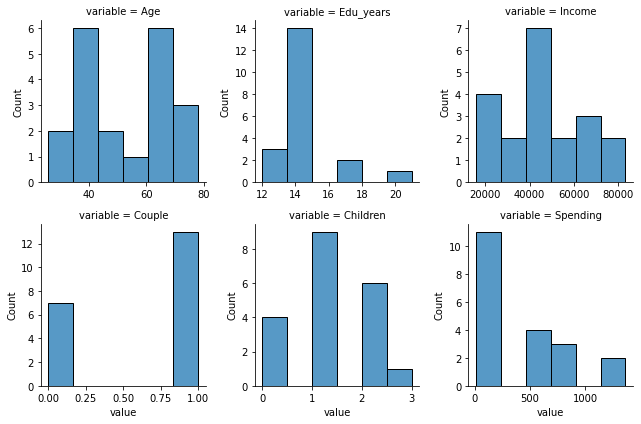

In [33]:
plot1=sns.FacetGrid(complains_melt, col='variable',col_wrap=3, sharex=False, sharey=False)
plot1=plot1.map(sns.histplot,'value')

In [ ]:
#Is there any correlation between variables age,income, spending, couple, children, Edu_year, 
#NumDealsPurchases, NumWebPurchases,NumCatalogPurchases,NumStorePurchases?

In [34]:
correlation=df[['Age','Income', 'Spending', 'Children', 'Edu_years','NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
#'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases'

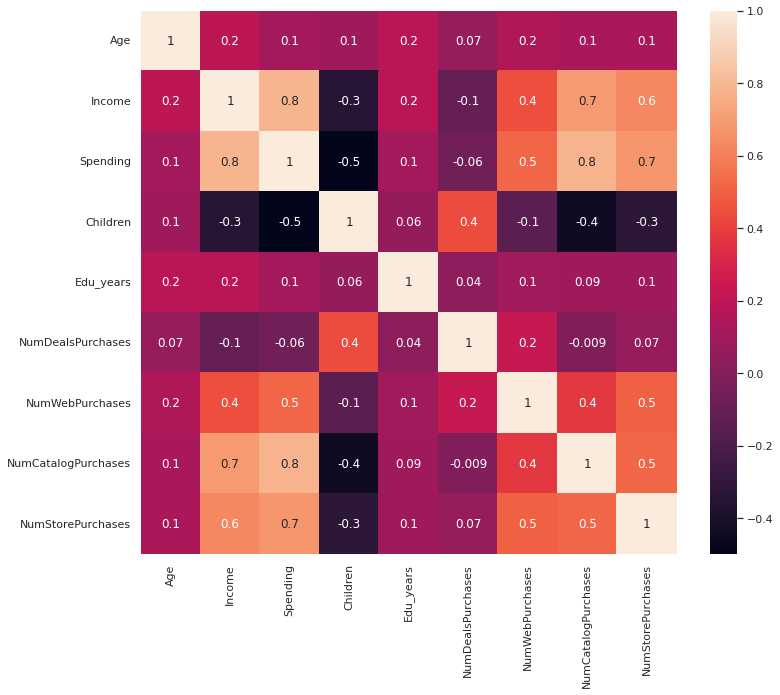

In [35]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(correlation.corr(),annot=True,fmt='.1g')

In [ ]:
df.drop(columns=['Edu_years_y',	'Edu_years'], inplace=True)

In [ ]:
df.to_csv('/sales_analysis.csv', index=False)
!cp /sales_analysis.csv "drive/My Drive/"

#Exportar productos y channels


In [ ]:
sales_channels=df[['ID','NumCatalogPurchases','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']]
sales_channels.to_csv('/sales_channels.csv', index=False)
!cp /sales_channels.csv "drive/My Drive/exportados Colab/"


In [ ]:
categories=df[['ID','MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]


In [ ]:
categories=categories.rename(columns={'MntWines':'Wines', 'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweet','MntGoldProds':'Gold'})

In [ ]:
categories=pd.melt(categories, id_vars=['ID'])

In [ ]:
categories

,ID,variable,value
0,1826,Wines,189
1,1,Wines,464
2,10476,Wines,134
3,1386,Wines,10
4,5371,Wines,6
...,...,...,...
13411,5043,Gold,144
13412,1951,Gold,30
13413,3628,Gold,26
13414,8373,Gold,9


In [ ]:
categories.to_csv('/categories.csv', index=False)
!cp /categories.csv "drive/My Drive/exportados Colab/"